In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# 设置图片字体
# macOS
# mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# windows
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 1. 数据准备

## 1.1 导入源数据

In [3]:
source_df = pd.read_csv('../source/borrow_data_80384.csv')
source_df.describe()

,id,borrow_amount,qq,phone,Spouse_phone,immediate_family_phone,pay_day,total_expense_monthly,gross_income_monthly
count,80383.000000,8.038300e+04,3.820000e+03,8.038300e+04,5.587800e+04,8.034800e+04,71043.000000,8.034600e+04,8.035900e+04
mean,40192.000000,8.431015e+04,1.286413e+09,1.535390e+10,1.565209e+10,1.694278e+13,20.583675,6.659722e+03,2.911702e+04
std,23204.717681,3.374671e+04,2.678974e+09,1.983863e+09,1.151345e+10,4.798127e+15,277.942728,5.139177e+05,3.694641e+05
min,1.000000,3.000000e+03,2.297730e+05,1.300133e+10,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.000000e-01
25%,20096.500000,7.000000e+04,3.450554e+08,1.373206e+10,1.373722e+10,1.372817e+10,10.000000,1.000000e+03,1.100000e+04
50%,40192.000000,8.000000e+04,6.546693e+08,1.503307e+10,1.513345e+10,1.515827e+10,15.000000,1.800000e+03,2.000000e+04
75%,60287.500000,1.000000e+05,1.264293e+09,1.599528e+10,1.774748e+10,1.772631e+10,25.000000,3.000000e+03,3.000000e+04
max,80383.000000,1.500000e+06,6.948040e+10,1.999761e+10,1.825837e+12,1.360064e+18,50000.000000,1.000000e+08,1.000000e+08


## 1.2 数据查看

In [4]:
source_df.shape

(80383, 36)

In [5]:
source_df.count()

id                                 80383
name                               80371
borrow_amount                      80383
gender                             80383
id_card_expire_data                80327
identity_card_issuing_authority    80330
permanent_residence_address        79852
address                            79576
wechat                             10037
qq                                  3820
id_card                            80371
phone                              80383
education                          80354
marital_status                     80370
child_num                          69051
residential_type                   70358
Spouse_name                        55928
Spouse_phone                       55878
Spouse_company                     31231
immediate_family_name              80358
immediate_family_relationship      80358
immediate_family_phone             80348
immediate_family_address           79983
company                            80375
department      

## 1.3 缺失值处理

In [6]:
source_df.isna().sum()

id                                     0
name                                  12
borrow_amount                          0
gender                                 0
id_card_expire_data                   56
identity_card_issuing_authority       53
permanent_residence_address          531
address                              807
wechat                             70346
qq                                 76563
id_card                               12
phone                                  0
education                             29
marital_status                        13
child_num                          11332
residential_type                   10025
Spouse_name                        24455
Spouse_phone                       24505
Spouse_company                     49152
immediate_family_name                 25
immediate_family_relationship         25
immediate_family_phone                35
immediate_family_address             400
company                                8
department      

In [7]:
# 暂不处理缺失值

## 1.4 异常值处理

## 1.5 重复值处理

In [8]:
source_df.duplicated().sum()

0

## 1.6 性别清洗

In [9]:
def get_gender_from_id_card(x):
    if x is np.nan:
        return '未知'
    number = int(x[-2])
    if number % 2 == 0:
        return '女'
    else:
        return '男'

In [10]:
source_df['gender'] = source_df['id_card'].apply(get_gender_from_id_card)

## 1.7 省份清洗

In [11]:
def clean_province(x):
    provinces = ['北京', '天津', '河北', '山西', '辽宁', '吉林', '上海', '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南', '广东', 	'广西', '海南', '重庆', '四川', '贵州', '云南', '西藏', '陕西', '甘肃', '青海', '宁夏', '新疆', '香港', '澳门', '台湾']
    if x is np.nan:
        return '未知'
    elif (pro := x[:3]) in ['黑龙江', '内蒙古']:
        return pro
    elif (pro := x[:2]) in provinces:
        return pro
    else:
        return '未知'

In [12]:
source_df['province'] = source_df['province'].apply(clean_province)

## 1.8 教育程度清洗

In [13]:
def clean_education(x):
    if x is np.nan:
        return '未知'
    elif x == '博士' or x == '硕士':
        return '研究生及以上'
    elif x == '大学':
        return '本科'
    elif x in ['小学', '初中', '高中']:
        return '高中及以下'
    else:
        return x

In [14]:
source_df['education'] = source_df['education'].apply(clean_education)

# 2. 数据分析

## 2.1 借款人性别分布

In [15]:
gender = source_df.groupby(by='gender')['id'].count()
gender

gender
女     21548
未知       12
男     58823
Name: id, dtype: int64

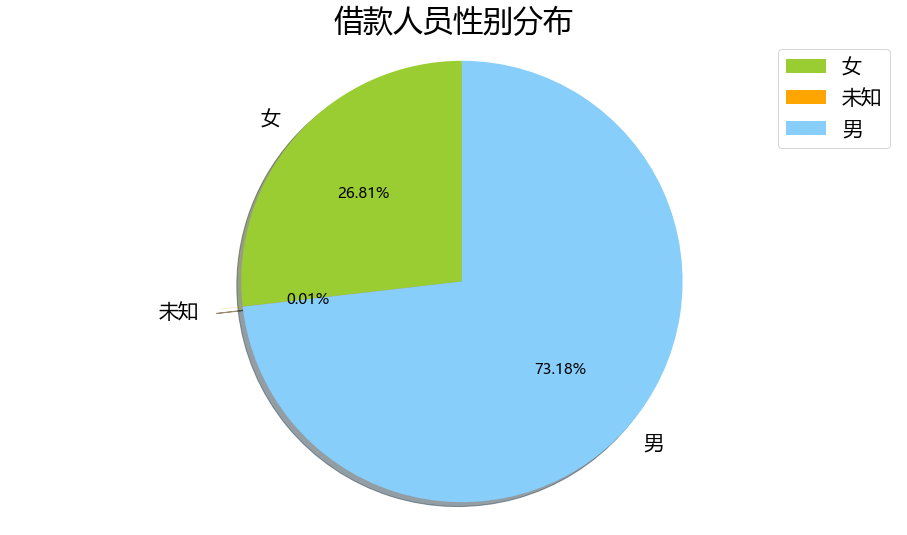

['女', '未知', '男']

In [16]:
plt.figure(figsize=(16, 9), facecolor='white')
labels = gender.index.to_list()
sizes = gender.values.tolist()
colors = ['yellowgreen', 'orange', 'lightskyblue']
explode = (0, 0.1, 0)
patches, l_text, p_text = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%2.2f%%',
    shadow=True,
    startangle=90,
    pctdistance=0.6,
)
for l in l_text:
    l.set_size(20)
for p in p_text:
    p.set_size(15)
plt.axis('equal')
plt.title('借款人员性别分布', fontsize=30)
plt.legend(loc='upper right', fontsize=20)
plt.savefig('../result/借款数据分析/借款人员性别分布.png')
plt.show()
labels

In [17]:
gender_amount = source_df.groupby(by='gender')['borrow_amount'].sum()
gender_amount

gender
女     1812667000
未知        970000
男     4963466145
Name: borrow_amount, dtype: int64

<AxesSubplot:title={'center':'各性别借款人员借款金额情况'}, ylabel='borrow_amount'>

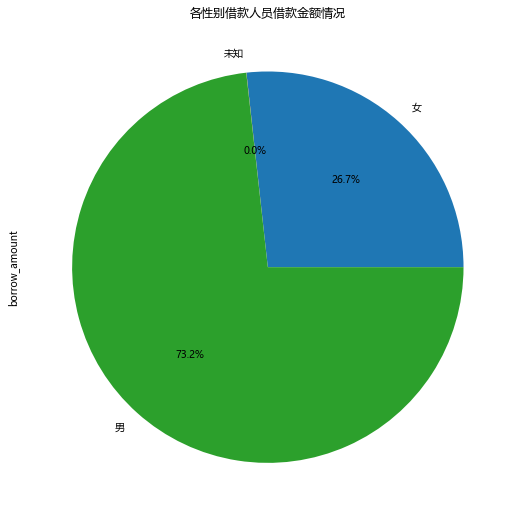

In [18]:
gender_amount.plot(kind='pie', autopct='%1.1f%%', title='各性别借款人员借款金额情况', figsize=(16, 9))

## 2.2 借款人省份分析

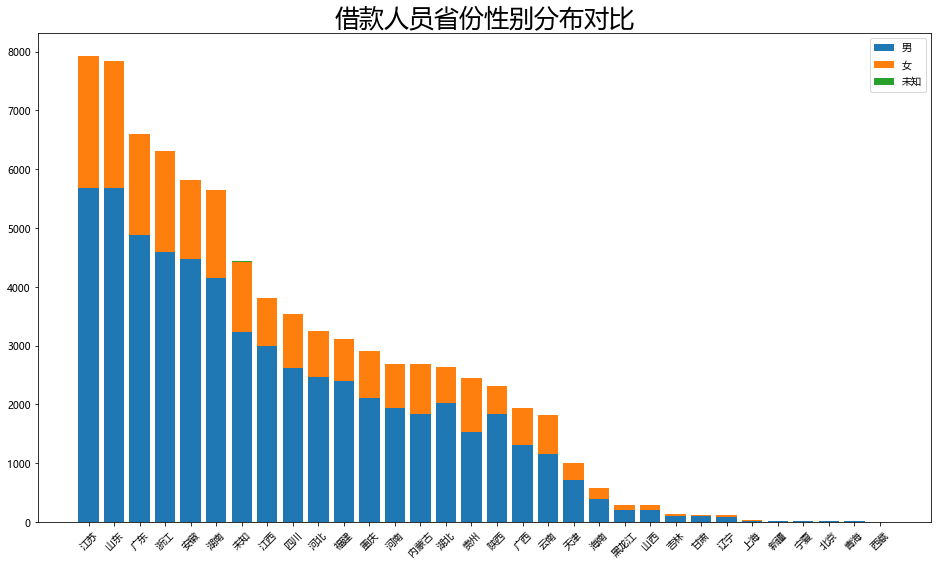

In [19]:
gender_province = source_df.groupby(by=['province', 'gender'])['id'].count()
gender_province = gender_province.reset_index(level=[0, 1])
gender_province = pd.pivot_table(
    gender_province,
    index='province',
    columns='gender',
    values='id',
    margins=True,
    aggfunc=[np.sum],
    fill_value=0,
)

gender_province.columns = ['女', '未知', '男', 'All']
gender_province.drop(labels='All', inplace=True)
gender_province.sort_values(by=['All'], ascending=False, inplace=True)
# gender_province
plt.figure(figsize=(16, 9), facecolor='white')
plt.bar(gender_province.index, gender_province['男'])
plt.bar(gender_province.index, gender_province['女'], bottom=gender_province['男'])
plt.bar(gender_province.index, gender_province['未知'], bottom=gender_province['男']+gender_province['女'])
plt.legend(['男', '女', '未知'], loc='upper right')
plt.xticks(rotation=45)
plt.title('借款人员省份性别分布对比', fontsize=25)
plt.savefig('../result/借款数据分析/借款人员省份性别分布对比.png')
plt.show()


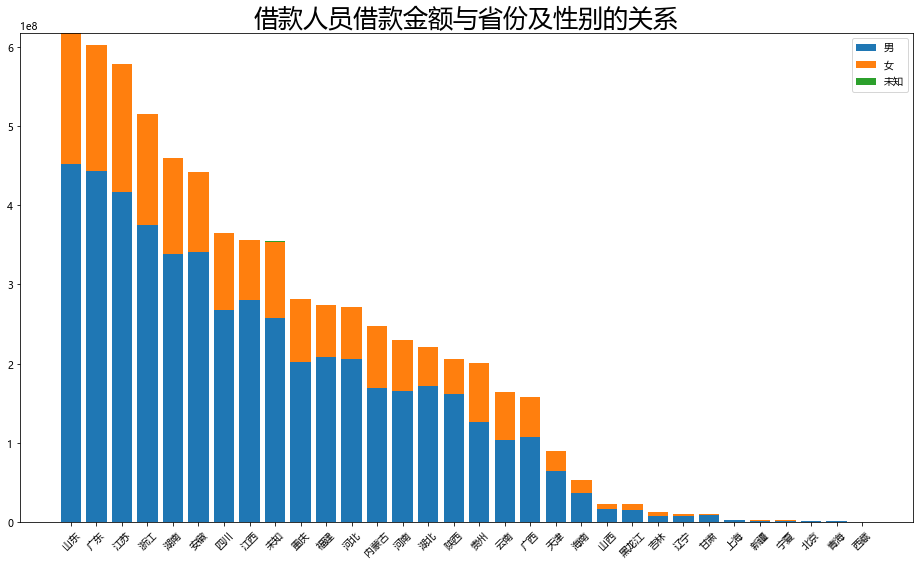

In [20]:
gender_province_amount = source_df.groupby(by=['province', 'gender'])['borrow_amount'].sum()
gender_province_amount = gender_province_amount.reset_index(level=[0, 1])
gender_province_amount = pd.pivot_table(
    gender_province_amount,
    index='province',
    columns='gender',
    values='borrow_amount',
    margins=True,
    aggfunc=[np.sum],
    fill_value=0,
)

gender_province_amount.columns = ['女', '未知', '男', 'All']
gender_province_amount.drop(labels='All', inplace=True)
gender_province_amount.sort_values(by=['All'], ascending=False, inplace=True)
# gender_province_amount
plt.figure(figsize=(16, 9), facecolor='white')
plt.bar(gender_province_amount.index, gender_province_amount['男'])
plt.bar(gender_province_amount.index, gender_province_amount['女'], bottom=gender_province_amount['男'])
plt.bar(gender_province_amount.index, gender_province_amount['未知'], bottom=gender_province_amount['男']+gender_province_amount['女'])
plt.legend(['男', '女', '未知'], loc='upper right')
plt.xticks(rotation=45)
plt.title('借款人员借款金额与省份及性别的关系', fontsize=25)
plt.savefig('../result/借款数据分析/借款人员借款金额与省份及性别的关系.png')
plt.show()

## 2.3 借款人学历分析

In [21]:
education = source_df.groupby(by=['education'])['id'].count()
education

education
中专         7219
大专        49862
未知           29
本科        13639
研究生及以上      477
高中及以下      9157
Name: id, dtype: int64

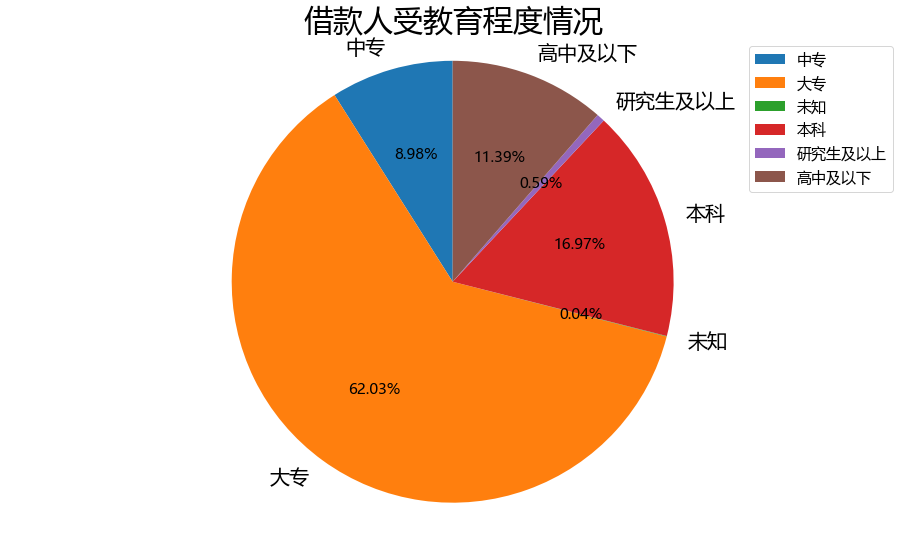

In [27]:
plt.figure(figsize=(16, 9), facecolor='white')
labels = education.index.to_list()
sizes = education.values.tolist()
patches, l_text, p_text = plt.pie(
    sizes,
    labels=labels,
    autopct='%2.2f%%',
    shadow=False,
    startangle=90,
    pctdistance=0.6,
)
for l in l_text:
    l.set_size(20)
for p in p_text:
    p.set_size(15)
plt.axis('equal')
plt.title('借款人受教育程度情况', fontsize=30)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('../result/借款数据分析/借款人受教育程度情况-pie.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


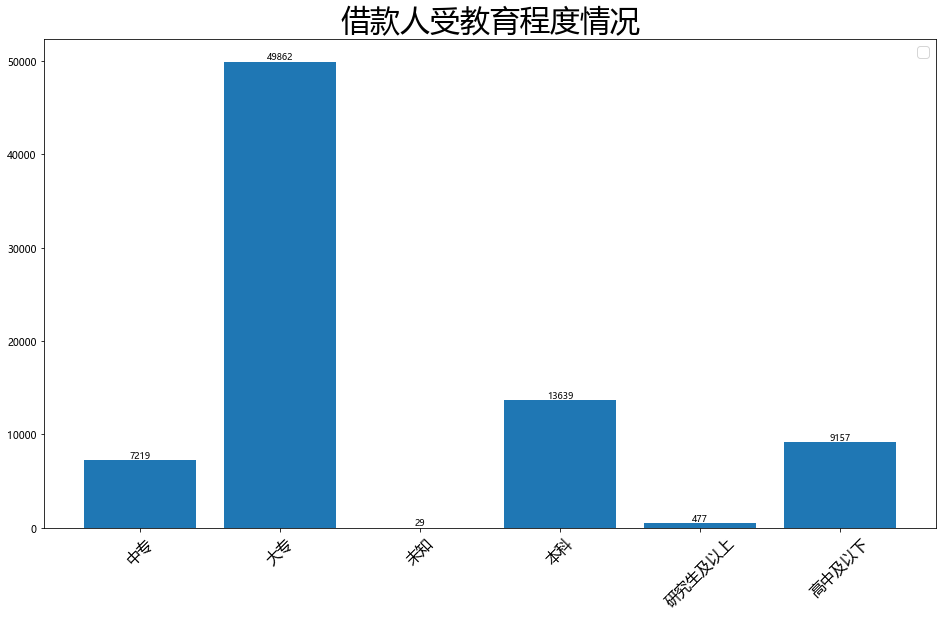

In [23]:
plt.figure(figsize=(16, 9), facecolor='white')
plt.bar(education.index, education.values)
for i, v in enumerate(education):
    plt.text(i, v, v, ha='center', va='bottom', fontsize=9, color='black')
plt.xticks(rotation=45, fontsize=15)
plt.title('借款人受教育程度情况', fontsize=30)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('../result/借款数据分析/借款人受教育程度情况-bar.png')
plt.show()